# Exploratory Analysis - Fatal Accident Reporting System (FARS)

## Hypothesis

Despite increases in AI technology in cars for things like collision detection/avoidance, lane drift systems, and various other
safety systems, pedestrian, cyclist, and motorist deaths are NOT significantly reduced by these interventions. In fact, the increase
in size of the average vehicle has increased the danger of collisions on average, especially for people outside of the driver's vehicle.
The increase in the average size of vehicles outpaces the overall increase in vehicle safety. Further, increases in vehicle safety are
disproportionately allocated to drivers and passengers, not those outside of the vehicle.

## Primary Research Question

* Is there a relationship between vehicle weight and fatality of auto crashes?
* Are cars with standard / optional AI based safety features less likely to be involved in fatal accidents?
* Do AI features offset risk factors (weight, alcohol consumption, time of day, etc)?



## Data Summary

There are multiple data files, and I'll be utilizing both the auxiliary and national files. The auxiliary files contain 
commonly extracted information about the vehicles, persons involved, and accidents. The raw files contain a large amount of data,
but we will only be utilizing a few variables. 

* FARS - Fatal Accident Reporting System. Code definitions can be found [here](https://static.nhtsa.gov/nhtsa/downloads/FARS/Links%20for%20FARS%20Manuals.pdf)
* CRSS - Crash reporting 

The variable coding is the same for both sources, though obviously one contains fatal accidents, where the other does not. What follows is a preliminary list of potential variables of interest
and that should be tracked. Importantly, there are auxiliary files which include commonly studied accident types, including pedestrian and cyclist accidents, both those involving a fatality
and not. These are stored in `ACC_AUX.CSV`, `PER_AUX.CSV`, etc. These files can be read in and joined to quickly find accidents involving certain
parties of interest.

Below here is a list of columns I was investigating. You may skim it.

### FARS

#### Accident Data

* **accident.csv**
  * ST_CASE - the merging key across files, used with VEH_NO
  * PERNOTMVIT - number of persons not in motor vehicle
  * MVIT - number of motor vehicles in transport
  * ROUTE - route name (interstate, local street, etc)
  * TYPE_INT - type of intersection
  * LGT_COND - light condition
  * WEATHER - weather conditions
  * FATALS - number of fatalities

#### Motorist Data

* **vpicdecode.csv**
  * ST_CASE
  * VEH_NO
  * PER_NO
  * VEHICLETYPE
  * MANUFACTURERFULLNAME
  * MODEL
  * MODELYEAR
  * TRIM
  * BODYCLASS_ID/BODYCLASS
  * CURBWEIGHTLB
  * ANTILOCKBRAKESYSTEMID / ANTILOCKBRAKESYSTEM
  * AUTOPEDESTRIANALERTINGSOUNDID / AUTOPEDESTRIANALERTINGSOUND
  * ELECTRONICSTABILITYCONTROLID, ELECTRONICSTABILITYCONTROL
  * TRACTIONCONTROLID, TRACTIONCONTROL
  * SAE AUTOMATION LEVEL FROM / TO - how automated the vehicle can be
  * CRASHIMMINENTBRAKINGID, CRASHIMMINENTBRAKING
  * DYNAMICBRAKESUPPORTID, DYNAMICBRAKESUPPORT
  * PEDESTRIANAUTOEMERGENCYBRAKINGID, PEDESTRIANAUTOEMERGENCYBRAKING
  * ADAPTIVECRUISECONTROLID, ADAPTIVECRUISECONTROL
  * LANEDEPARTUREWARNINGID, LANEDEPARTUREWARNING
  * DAYTIMERUNNINGLIGHTID, DAYTIMERUNNINGLIGHT
  * ENGINEBRAKEHP_FROM/TO
  * BODYCLASS

* **drimpair.csv**
  * ST_CASE
  * VEH_NO
  * PER_NO
  * DRIMPAIR - Was the driver impaired or not
* **distract.csv**
  * ST_CASE
  * VEH_NO
  * PER_NO
  * DRDISTRACT - Was the driver distracted or not


#### Non-motorist data

* **safetyeq.csv**
  * ST_CASE
  * VEH_NO
  * NMHELMET - Helmet Use
  * NMREFCLO - Reflective Clothing
  * NMLIGHT - Nonmotorist use of Lights

* **pbtype.csv**
  * ST_CASE
  * VEH_NO
  * PBAGE - age of cyclist/pedestrian
  * PBPTYPE - pedestrian or cyclist, basically
  * PEDLOC - location of pedestrian
  * BIKELOC - location of bicycle 
  * PEDPOS - position of pedestrian
  * BIKEPOS - position of bicycle 
  * PEDCGRP - crash group pedestrian (right turn/ failure to yield, etc)
  * BIKECGRP - crash group bicycle (right turn/ failure to yield, etc)


### CRSS

In many cases, coding is shared in the CRSS and FARS. Most notably, this is the case for VIN based features.

* CASENUM - case number
* REGION
* URBANICITY - rural/urban
* STRATUM - basically crash severity
* WEIGHT - case weight for creating national samples from the data
* VEH_NO
* PER_NO

* **accident.csv**
  * PERNOTMVIT - number of people not in vehicle
  * VE_FORMS - Number of vehicles in transport
  * PERMVIT - persons in motor vehicle
  * TYPE_INT - type of intersection
  * LGT_COND - light condition
  * WEATHER - weather conditions
  * MAX_SEV - Maximum injury severity in the crash
  * ALCOHOL / ALCOHOL_IM
* **person.csv**
  * AGE
  * PER_TYP
  * INJ_SEV
  * REST_USE - restraint use
  * HELM_USE - helmet use
  * ALC_RES / DRUGS
  * STR_VEH - number of vehicle striking non-motorist
  * DEVTYPE - non motorist device type
  * LOCATION - non motorist location
  * PEDLOC - location of pedestrian
  * BIKELOC - location of bicycle 
  * PEDPOS - position of pedestrian
  * BIKEPOS - position of bicycle 
  * PEDCGP - crash group pedestrian (right turn/ failure to yield, etc)
  * BIKECGP - crash group bicycle (right turn/ failure to yield, etc)
* **distract.csv**
* **drimpair.csv**

* **vpicdecode.csv**
  * ST_CASE
  * VEH_NO
  * PER_NO
  * VEHICLETYPE
  * MANUFACTURERFULLNAME
  * MODEL
  * MODELYEAR
  * TRIM
  * BODYCLASS_ID/BODYCLASS
  * CURBWEIGHTLB
  * ANTILOCKBRAKESYSTEMID / ANTILOCKBRAKESYSTEM
  * AUTOPEDESTRIANALERTINGSOUNDID / AUTOPEDESTRIANALERTINGSOUND
  * ELECTRONICSTABILITYCONTROLID, ELECTRONICSTABILITYCONTROL
  * TRACTIONCONTROLID, TRACTIONCONTROL
  * SAE AUTOMATION LEVEL FROM / TO - how automated the vehicle can be
  * CRASHIMMINENTBRAKINGID, CRASHIMMINENTBRAKING
  * DYNAMICBRAKESUPPORTID, DYNAMICBRAKESUPPORT
  * PEDESTRIANAUTOEMERGENCYBRAKINGID, PEDESTRIANAUTOEMERGENCYBRAKING
  * ADAPTIVECRUISECONTROLID, ADAPTIVECRUISECONTROL
  * LANEDEPARTUREWARNINGID, LANEDEPARTUREWARNING
  * DAYTIMERUNNINGLIGHTID, DAYTIMERUNNINGLIGHT
  * ENGINEBRAKEHP_FROM/TO
  * BODYCLASS



## EDA Plots and Figures

In [109]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

non_fatal = pd.read_csv("data/CRSS2022CSV/accident.csv", index_col="CASENUM")
fatal = pd.read_csv(
    "./data/FARS2022NationalCSV/accident.csv",
    index_col="ST_CASE",
    encoding_errors="ignore",
)

One of the most important considerations for when fatal crashes occur is the time of day.
Below, we see very different distributions based on time of day conditional
on whether the accident had a fatality or not.

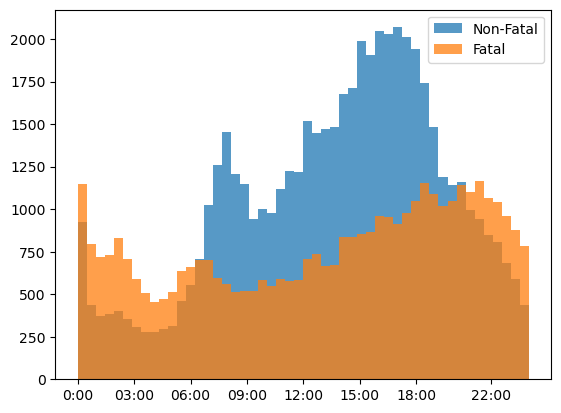

In [133]:
minute_of_day = (non_fatal["HOUR"] * 60 + non_fatal["MINUTE"])*(non_fatal["MINUTE"] < 99)
fatal_minute_of_day = (fatal["HOUR"] * 60 + fatal["MINUTE"])*(fatal["MINUTE"] < 99)

fig, ax = plt.subplots()
plt.hist(minute_of_day, label="Non-Fatal", alpha=0.75, bins=50)
plt.hist(fatal_minute_of_day, label="Fatal", alpha=0.75, bins=50)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x // 60):02d}:{int(x % 60):02d}'))
ax.set_xticks([0, 180, 360, 540, 720, 900, 1080, 1320])
ax.set_xticklabels(['0:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '22:00'])
plt.legend()
# sns.histplot(minute_of_day, title="Minute of Day of Non-Fatal Accidents")

We'll look at a few things. First, what types of injuries are storyed in the non-fatal chart.

<Axes: ylabel='STRATUMNAME'>

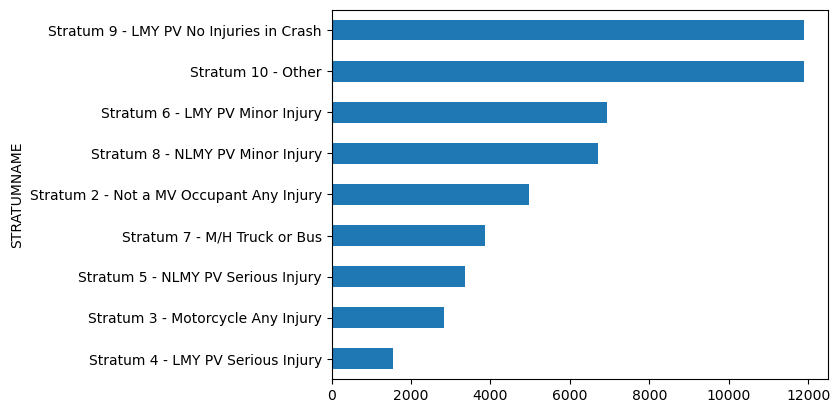

In [110]:
non_fatal["STRATUMNAME"].value_counts().sort_values().plot(kind="barh")

It looks like there are quite a few injuries attributable to motorcycles. The most common injury category is no injury. 
Stratum 2 is when either a pedestrian or cyclist was injured or killed. Notably, there is a large proportion of "Other", 
Stratum 10, which may need to be focused on when considering cyclists or pedestrians who were not injured in an accident.

In [111]:
fatal.groupby(["PERNOTMVIT"]).size()

PERNOTMVIT
0     30156
1      8515
2       426
3        74
4        28
5        10
6         1
7         4
8         3
9         1
20        1
23        1
73        1
dtype: int64

There were 8,515 fatal crashes with a single person outside the vehicle. To simplify the analysis in the future, we could focus ONLY on
those cases, which should include bikes and pedestrians. Let's see if we can get that from the auxiliary files. These number is not perfect - there
is quite a bit involved in getting the exact values and coding right.

In [112]:
acc_aux_fatal = pd.read_csv(
    "./data/FARS2022NationalAuxiliaryCSV/ACC_AUX.CSV", index_col="ST_CASE"
)
per_fatal = pd.read_csv("./data/FARS2022NationalCSV/person.csv", index_col="ST_CASE")

acc_aux_nonfatal = pd.read_csv("./data/CRSS2022AuxiliaryCSV/ACC_AUX.CSV", index_col="CASENUM")
per_nonfatal = pd.read_csv("./data/CRSS2022CSV/person.csv", index_col="CASENUM")

# join only accidents with pedestrians/or cyclists involved
# acc_aux_fatal.columns
fatal_ped_bike_accidents = acc_aux_fatal[
    (acc_aux_fatal["A_PEDAL"] == 1) | (acc_aux_fatal["A_PED"] == 1)
][["YEAR", "STATE", "A_CT", "A_WEATHER"]].join(
    per_fatal[["VEH_NO", "PER_NO", "INJ_SEV"]], on="ST_CASE"
)

fatal_ped_bike_accidents = fatal_ped_bike_accidents[
    fatal_ped_bike_accidents["VEH_NO"] == 0  # vehicle 0 corresponds to the pedestrian/cyclist
]

nonfatal_ped_bike_accidents = acc_aux_nonfatal[
    (acc_aux_nonfatal["A_PEDAL"] == 1) | (acc_aux_nonfatal["A_PED"] == 1)
][["YEAR", "A_CT", "A_WEATHER"]].join(
    per_nonfatal[["VEH_NO", "PER_NO", "INJ_SEV"]], on="CASENUM"
)

nonfatal_ped_bike_accidents = nonfatal_ped_bike_accidents[
    nonfatal_ped_bike_accidents["VEH_NO"] == 0  # vehicle 0 corresponds to the pedestrian/cyclist
]

mappings = {
    "INJ_SEV": {
        0: "No Apparent Injury",
        1: "Possible Injury",
        2: "Suspected Minor Injury",
        3: "Suspected Serious Injury",
        4: "Fatal Injury",
        5: "Injured, Severity Unknown",
        6: "Died Prior to Crash",
        9: "Unknown/Not Reported",
    }
}


/var/folders/qk/w86hxqjx1sz7tb4pk4_gy8pm0000gn/T/ipykernel_71523/1975694813.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  per_fatal = pd.read_csv("./data/FARS2022NationalCSV/person.csv", index_col="ST_CASE")


<Axes: xlabel='count', ylabel='INJ_SEV'>

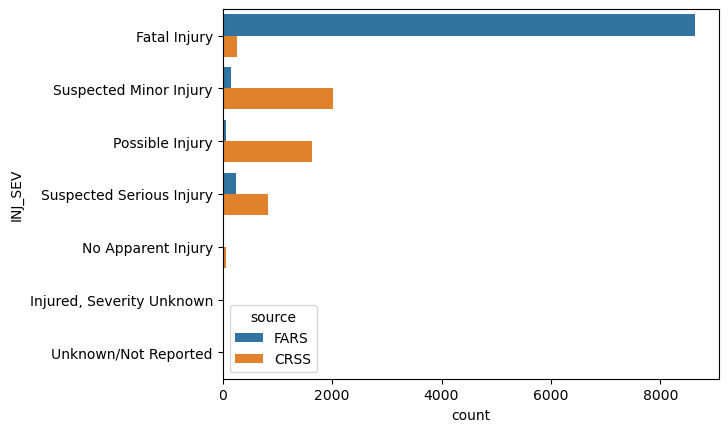

In [113]:
fatality_source = pd.concat([
    fatal_ped_bike_accidents[["INJ_SEV"]].assign(source="FARS"),
    nonfatal_ped_bike_accidents[["INJ_SEV"]].assign(source="CRSS"),
]).value_counts().rename(index=mappings["INJ_SEV"]).reset_index()
fatality_source = fatality_source.rename(columns={0: "count"})
sns.barplot(data=fatality_source, y="INJ_SEV", x="count", hue="source", orient="h")

Unsurprisingly, among the fatal injuries listed in the file, the deceased person was the person outside the vehicle. We can tell this because
the person corresponds to person 0. Next, it appears that of all the pedestrian and cyclist injury severities, most of them were fatal.

<Axes: xlabel='proportion', ylabel='LGT_COND'>

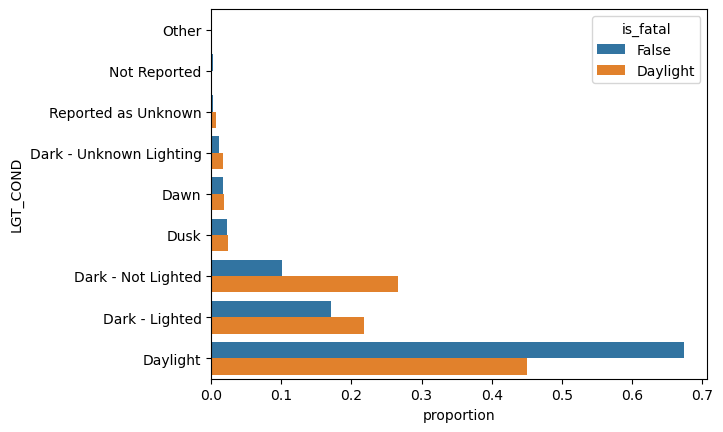

In [114]:
lgt_values = {
    1: "Daylight",
    2: "Dark - Not Lighted",
    3: "Dark - Lighted",
    4: "Dawn",
    5: "Dusk",
    6: "Dark - Unknown Lighting",
    7: "Other",
    8: "Not Reported",
    9: "Reported as Unknown",
}

lgt_conditions = pd.concat(
    [
        fatal[["LGT_COND"]].assign(is_fatal=True),
        non_fatal[["LGT_COND"]].assign(is_fatal=False),
    ]
)

plot_data = (
    lgt_conditions.groupby("is_fatal")
    .value_counts(ascending=True)
    .rename(index=lgt_values)
    .reset_index()
)  # .plot(kind="barh", x="LGT_COND", colorbar="is_fatal")
plot_data["proportion"] = plot_data.groupby("is_fatal")["count"].transform(
    lambda x: x / x.sum()
)
sns.barplot(data=plot_data, y="LGT_COND", x="proportion", hue="is_fatal", orient="h")

As expected, there's a considerable relationship between the time of day / light conditions and whether an accident is fatal or
not.

Let's look at some vehicle data. We are also concerned about the overall weight of the vehicle, so we will check high level 
fatality proportions accordingly.

In [35]:
non_fatal_vehicle = pd.read_csv(
    "data/CRSS2022CSV/vpicdecode.csv", index_col="CASENUM", encoding_errors="ignore"
)
non_fatal_vehicle.columns = [col.upper() for col in non_fatal_vehicle.columns]
fatal_vehicle = pd.read_csv(
    "data/FARS2022NationalCSV/vpicdecode.csv",
    index_col="ST_CASE",
    encoding_errors="ignore",
)
vehicle_data = pd.concat(
    [non_fatal_vehicle.assign(fatal=False), fatal_vehicle.assign(fatal=True)]
)

/var/folders/qk/w86hxqjx1sz7tb4pk4_gy8pm0000gn/T/ipykernel_71523/3106588698.py:1: DtypeWarning: Columns (4,60,100) have mixed types. Specify dtype option on import or set low_memory=False.
  non_fatal_vehicle = pd.read_csv("data/CRSS2022CSV/vpicdecode.csv", index_col="CASENUM", encoding_errors="ignore")
/var/folders/qk/w86hxqjx1sz7tb4pk4_gy8pm0000gn/T/ipykernel_71523/3106588698.py:3: DtypeWarning: Columns (62,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  fatal_vehicle = pd.read_csv("data/FARS2022NationalCSV/vpicdecode.csv", index_col="ST_CASE", encoding_errors="ignore")


<Axes: xlabel='proportion', ylabel='BODYCLASS'>

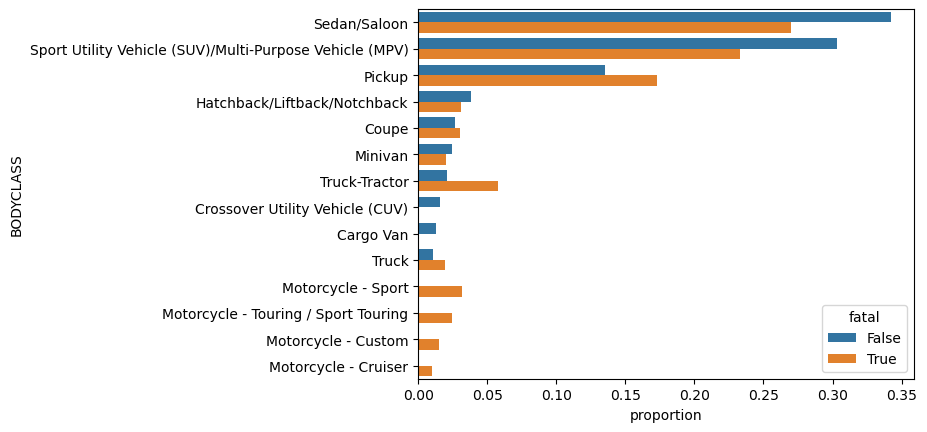

In [36]:
plot_df = (
    vehicle_data.groupby(["fatal"])["BODYCLASS"]
    .value_counts(normalize=True)
    .reset_index()
)

plot_df = plot_df[plot_df["proportion"] > 0.01]
sns.barplot(data=plot_df, y="BODYCLASS", x="proportion", hue="fatal", orient="h")

Somewhat surprisingly, motorcycles crashes seem to be 100% fatal according to our data. This is probably an error in how I'm reading in the 
data or interpreting it, but for now, it's notable that fatal accident proportions (normalized within vehicle body class), do 
not conform to the trends I expected. First, SUVs / MPVs do not have a higher proportion of fatal accidents. However, pickup trucks
do have a higher proportion, as do truck/tractors. In the final analysis, we will probably just exclude motorcycles.

<Axes: xlabel='proportion', ylabel='GROSSVEHICLEWEIGHTRATINGFROM'>

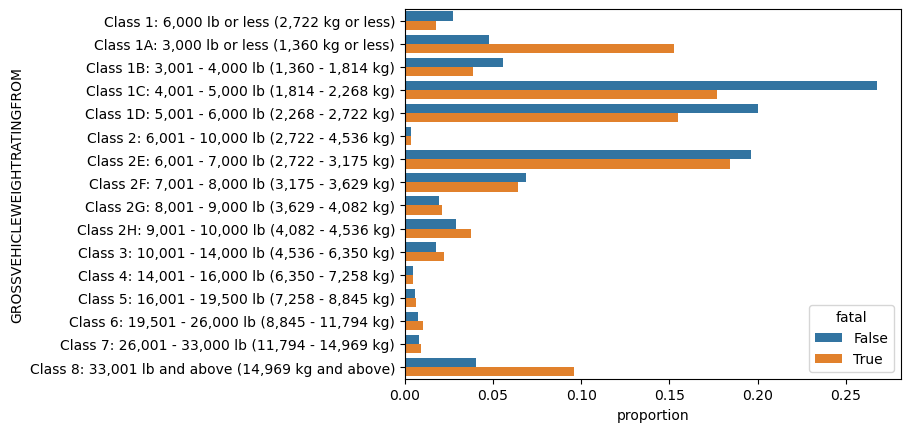

In [41]:
fatal_vehicle_data = (
    vehicle_data.groupby("fatal")["GROSSVEHICLEWEIGHTRATINGFROM"]
    .value_counts(normalize=True)
    .sort_index()
    .reset_index(name="proportion")
)
sns.barplot(
    data=fatal_vehicle_data,
    y="GROSSVEHICLEWEIGHTRATINGFROM",
    x="proportion",
    hue="fatal",
)

Looking further here, we can break down how fatal an accident is expected to be by the weight class of the vehicle. Far and away, the most striking case is Class 1A, which
I believe includes motorcycles. After that, this is a loose association with vehicle weight, but not perfect.

Finally, there's the notion of security system and assisted driving features.

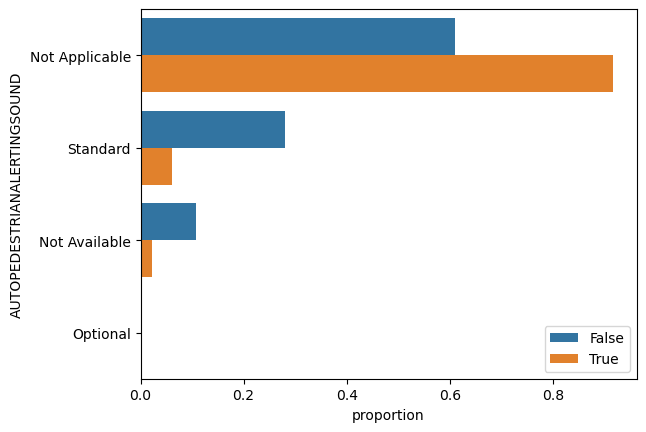

In [42]:
alert_df = (
    vehicle_data.groupby(
        [
            "fatal",
        ]
    )["AUTOPEDESTRIANALERTINGSOUND"]
    .value_counts(normalize=True)
    .reset_index(name="proportion")
)
sns.barplot(
    data=alert_df,
    y="AUTOPEDESTRIANALERTINGSOUND",
    x="proportion",
    hue="fatal",
    orient="h",
)
plt.legend(loc="lower right")

This could be a bit worrisome for the analysis - there's a lot of missingness, but it's possible that it's not missing
at random, and in fact we may assume that some safety features in cars are absent if listed as non-applicable. This variable
was chosen because it very directly relates to pedestrian safety, but there are several other safety features of note,
namely ABS brakes, adaptive cruise control, lane keeping, etc. These could all potentially be included in the analysis to see
whether those safety features make a difference to passenger safety.

## Summary

Some quick initial findings:

1) There is quite a lot of data in just 2022. We can go back several years to populate more.
2) The two systems, CRSS and FARS, do not really overlap, so getting the data together requires quite a bit of parsing and putting things together.
3) Weight class seems to have an impact on fatalities in vehicles. BUT we haven't limited the weight class to look only at pedestrian and cyclist fatalities. 
4) Lighting appears to play a big role in fatal vs. non fatal accidents, with a larger share of fatal accidents occurring in the dark compared to non-fatal accidents.
5) There are a lot more variables to control for: weather, speed of collision, intersection type, road type, etc. 
6) All of these are listed by state and region - it could be beneficial to explore whether these relationships shift throughout the country.
7) I'll need to dig into the data definitions very carefully for the data, as there are many files to merge and a lot of documentation to wade through. That being said, the dataset is well documented.
8) There are case weights for the CRSS data in order to estimate national level aggregates. I'll need to apply those before I draw any conclusions.

There are a ton of research avenues in this dataset. I believe I am going to focus on pedestrian and cyclist crashes and test whether advanced vehicle safety features have any
positive effects on non-motorist safety. It could also be beneficial to see how these safety features affect drivers as well.